In [7]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots 

numpy.ndarray

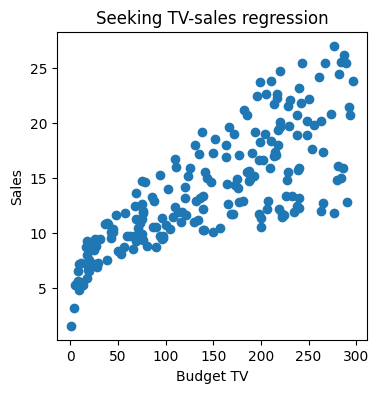

In [14]:
sales = pd.read_csv("../data/Advertising.csv")
fig, axes = subplots(figsize=(4, 4))

x = np.array( sales['TV'] )
y = np.array( sales['sales'] )

axes.scatter(x, y, marker='o')
axes.set_xlabel('Budget TV')
axes.set_ylabel('Sales')
axes.set_title('Seeking TV-sales regression')

In [21]:
def estimate_parameters( x : np.array, y : np.array ) -> tuple[float, float]:
    x_sample_mean = x.mean()
    y_sample_mean = y.mean()

    divisor = 0
    dividend = 0
    for i in range(0, len(x)):
        dividend += ( x_sample_mean - x[i] ) ** 2
        divisor += ( y[i] - y_sample_mean ) * ( x[i]  - x_sample_mean )
    
    beta_1 = dividend / divisor
    beta_0 = y_sample_mean - beta_1 * x_sample_mean
    return beta_0, beta_1

Beta_0: -3079.22 and Beta_1: 21.04


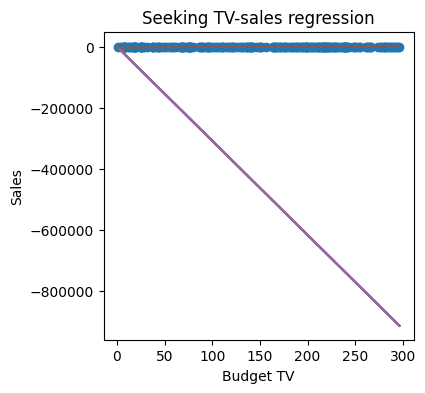

In [22]:
beta_0, beta_1 = estimate_parameters( x, y )

x_line = np.linspace( 0, x.max(), 50 )
y_line = beta_1 * x_line + beta_0


print(f'Beta_0: {beta_0:.2f} and Beta_1: {beta_1:.2f}')

axes.plot( x_line, y_line )

fig